# **Exploratory Data Analysis on Airbnb Dataset**

**Objective**: Conduct an exploratory data analysis (EDA) on a dataset of Airbnb listings to gain insights into the factors affecting rental prices and customer satisfaction.

**Tasks**:

- Import and clean the dataset: Handle missing values, remove duplicates, and perform necessary data transformations.
- Conduct descriptive statistics analysis: Calculate mean, median, mode, variance, and standard deviation for numerical variables
- Visualize the data: Create appropriate visualizations (e.g., histograms, boxplots, bar charts) to analyze the distribution of numerical variables and the relationships between categorical and numerical variables.
- Analyze geographical data: Create a heatmap to visualize the density of listings across New York City neighborhoods. Identify areas with the highest concentration of Airbnb listings.
- Investigate the relationship between room type, neighborhood group, and price. Perform appropriate statistical tests (e.g., t-test, ANOVA) to determine if there are significant differences in rental prices based on room type and neighborhood group.
- Analyze the relationship between customer satisfaction (as measured by the number of reviews and reviews_per_month) and factors such as price, room type, and neighborhood group.
- Based on your findings, provide recommendations to Airbnb hosts on how to improve customer satisfaction and increase rental prices. Consider potential strategies such as offering different room types, targeting specific neighborhoods, or adjusting pricing based on demand and competition.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns  

In [53]:
data=pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [54]:
data[data['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [55]:
data.shape

(48895, 16)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [57]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

we have null values in name,host name ,last review and reviews per month 

In [58]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [59]:
data.drop(['name','host_id','host_name','last_review'], axis='columns',inplace=True)

i drop the column name ,host id , host name , and last review cause i don't need them for the analysis as of now in my perspective for my analysis,  

In [60]:
data

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [61]:
data['reviews_per_month']=data['reviews_per_month'].fillna(0)

i filled na values with 0 cause i see that the place where we have NA values for that row ,we also don't have any number of reviews so it will be wrong if we will put mean median or any other method here 

In [62]:
data['reviews_per_month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
48895 non-null  float64
dtypes: float64(1)
memory usage: 382.1 KB


In [63]:
data.head(10)

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,5121,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,5203,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,5238,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [64]:
data['neighbourhood_group'].nunique() # there are only 5 nighourhood groups in our column

5

In [65]:
data.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


we can see here our mean(average),median(50%),standard deviation of our all of the column

In [66]:
variance = data.var()
variance

C:\Users\joshi\AppData\Local\Temp\ipykernel_23924\401616790.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = data.var()


id                                1.206287e+14
latitude                          2.973529e-03
longitude                         2.130444e-03
price                             5.767403e+04
minimum_nights                    4.206826e+02
number_of_reviews                 1.984754e+03
reviews_per_month                 2.551312e+00
calculated_host_listings_count    1.085868e+03
availability_365                  1.732443e+04
dtype: float64

as we know standard deviation is the sqrt of variance , Both variance and standard deviation are useful for summarizing the spread of data and identifying outliers or extreme value

# **EDA**

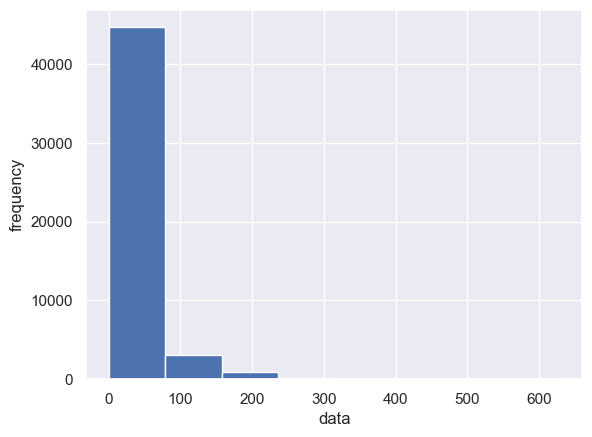

In [67]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()

ax.hist(data['number_of_reviews'],bins=8)
plt.xlabel('data')
plt.ylabel('frequency')
plt.show()

number of review distribution is highly skewed 

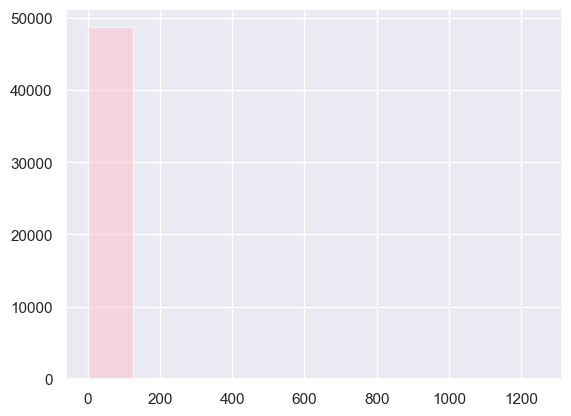

In [68]:
fig,ax=plt.subplots()

ax.hist(data['minimum_nights'],bins=10,alpha=0.5,color='pink',)
ax.set_label('minimum nights')
ax.set_label('frequency')
plt.show()

the distribution of min nights is highly skewed

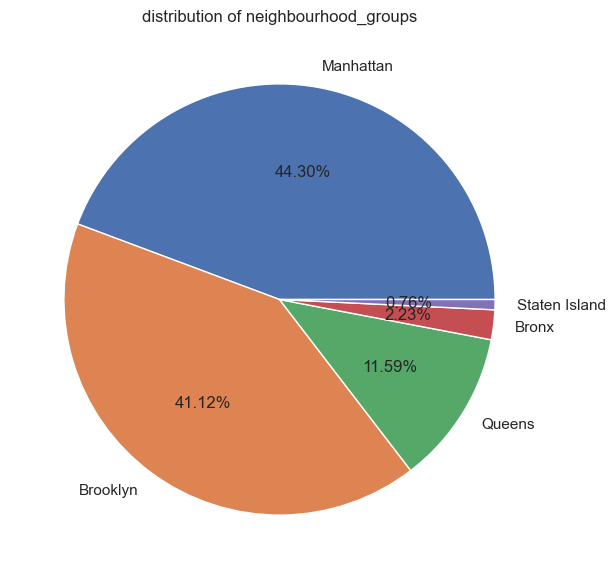

In [69]:
fig=plt.figure(figsize=(10,7))
counts=data['neighbourhood_group'].value_counts()
plt.pie(counts.values,labels=counts.index,autopct='%.2f%%')
plt.title('distribution of neighbourhood_groups')
plt.show()

we can see here that most of the airbnb rooms are at Manhattan group that is  more than 44% and then brooklyn is the 2nd group which has around 41%

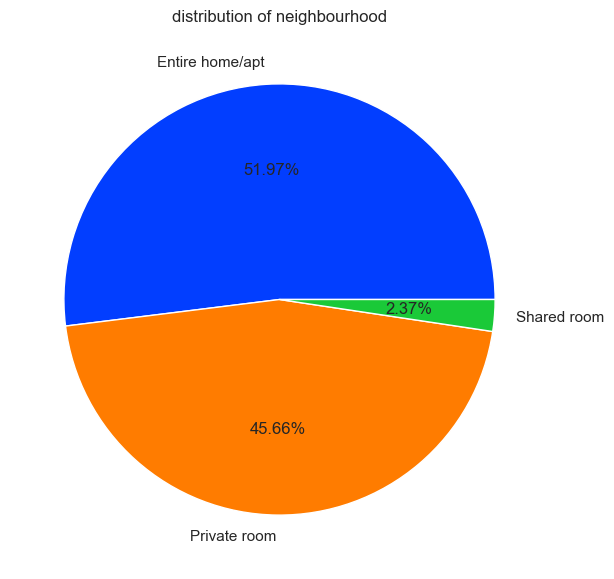

In [70]:
fig=plt.figure(figsize=(10,7))
counts=data['room_type'].value_counts()
palette_color=sns.color_palette('bright')
plt.pie(counts.values,labels=counts.index,autopct='%.2f%%',colors=palette_color)
plt.title('distribution of neighbourhood')
plt.show()

we can see that there are more entire home/apt more than 50% and 45% private rooms and shared rooms are less than 3%

In [71]:
data[data['price']==data['price'].max()]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,13894339,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,22436899,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


you can see queens,brooklyn and manhattan has the highest price rooms , two are entire home/apt, and one is a private room

In [72]:
data.sort_values(by='number_of_reviews',ascending=False).head(10)

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


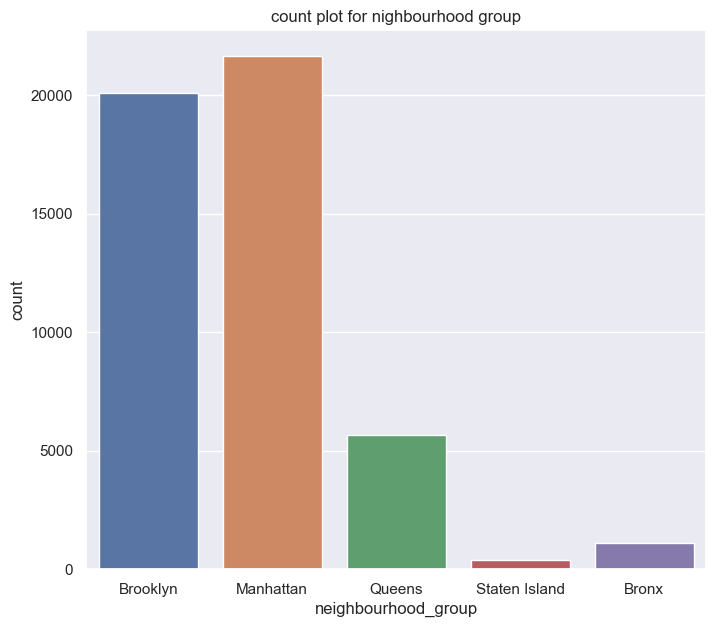

In [73]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,7))

sns.countplot(x=data['neighbourhood_group'])

plt.title('count plot for nighbourhood group')
# plt.xlable('neighbourhood_group')
plt.ylabel('count')
plt.show()

here i tried to see the number of count of each neighbourhood here we can manhattan has more than 20000 

In [75]:
data.loc[data.groupby('neighbourhood_group')['availability_365'].idxmax()]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
261,63610,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,0.50,13,365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
181,45910,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,0.11,5,365
2282,1096326,Staten Island,St. George,40.64699,-74.08151,Entire home/apt,190,2,0,0.00,1,365


In [76]:
data.loc[data['availability_365'] > 365]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


i tried to see are there any peoples who are for more than 365 days at any of the nighbourhood_groups but there are no more than 365 days stays

<AxesSubplot: >

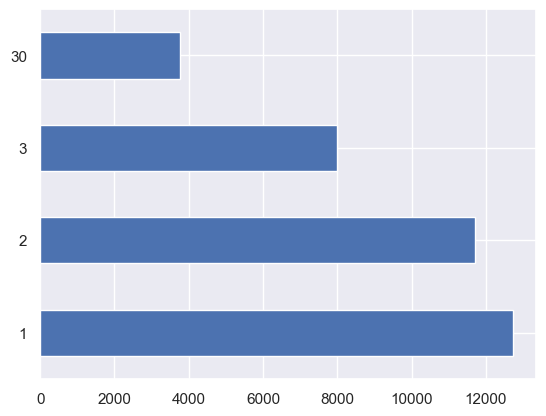

In [77]:
data['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

there are more than 12k peoples who stay for 1 night and there are less peoples who's minimum night is 30

<AxesSubplot: xlabel='availability_365'>

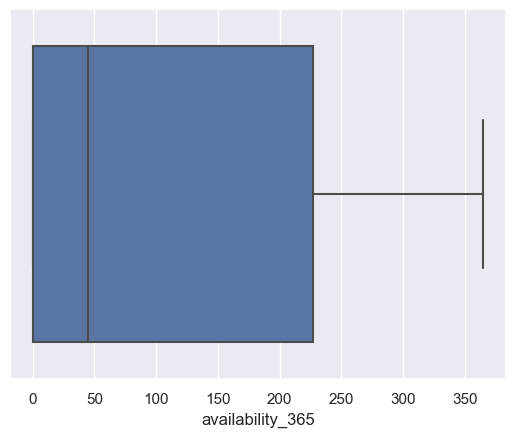

In [79]:
sns.boxplot(x=data['availability_365'])

thera are no outliers in the availability_365

In [80]:

# the amount of listing clusters in New York City

# some important libraries for it
import folium as fl
from folium.plugins import PolyLineTextPath
from folium.plugins import HeatMap

# a function for drawing map
def draw_map():
    nyc = [data.latitude.mean(), data.longitude.mean()]
    boroughs = data.groupby('neighbourhood_group').mean().reset_index()
    boroughs_name = boroughs['neighbourhood_group'].values.tolist()
    boroughs_loc = boroughs[['latitude', 'longitude']].values.tolist()

    base_map = fl.Map(location = nyc, control_scale = True, zoom_start = 11, tiles = 'OpenStreetMap')

    for i in range(len(boroughs_name)):
        attr = {'fill': 'midnightblue', 'font-weight': 'bold', 'font-size': '20'}
        pl = fl.PolyLine([[boroughs_loc[i][0], boroughs_loc[i][1]-.1], [boroughs_loc[i][0], boroughs_loc[i][1]+.1]], weight = 15, color = 'rgb(255,255,255, 0)')
        base_map.add_child(pl)
        base_map.add_child(PolyLineTextPath(pl, text = boroughs_name[i], attributes = attr, center = True))

    return base_map

base_map = draw_map()
base_map.add_child(HeatMap(data = data[['latitude', 'longitude']], min_opacity = 0.2, radius = 15, blur = 40))
base_map.add_child(fl.ClickForMarker(popup='High amount of listings'))

## Now we can see Manhattan and Brooklyn have the most amount of listing options available

C:\Users\joshi\AppData\Local\Temp\ipykernel_23924\2128984847.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  boroughs = data.groupby('neighbourhood_group').mean().reset_index()


**Now we can see Manhattan and Brooklyn have the most amount of listing options available**

**the darker the area is the more the listing options are availabel there**

<AxesSubplot: xlabel='price'>

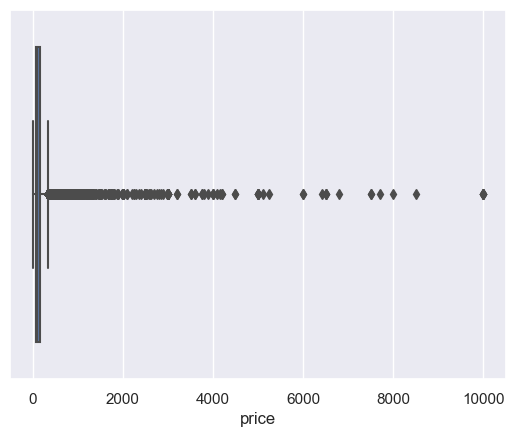

In [81]:
sns.boxplot(x=data['price'])

In [82]:
data=data[data["price"]<250]
data=data[data["price"]>20] # here i just removed the outliers of price because there are some outliers in price

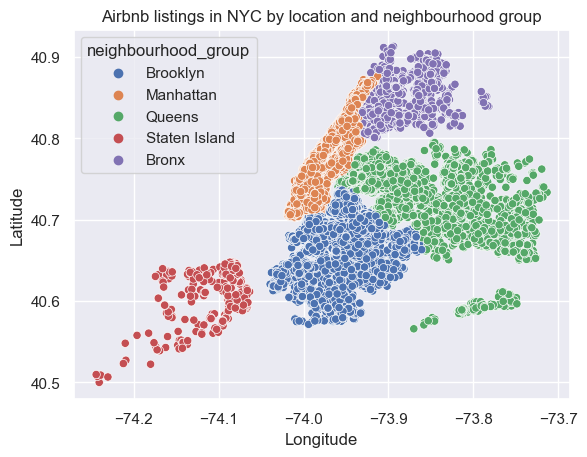

In [83]:
# Create a scatter plot of longitude vs. latitude, with the color of the points representing the neighbourhood_group category
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group')

# Set the x and y axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the title of the plot
plt.title('Airbnb listings in NYC by location and neighbourhood group')

# Show the plot
plt.show()

here we can see the neighbourhood location in this group we can also see that brooklyn and qeens are highest listings

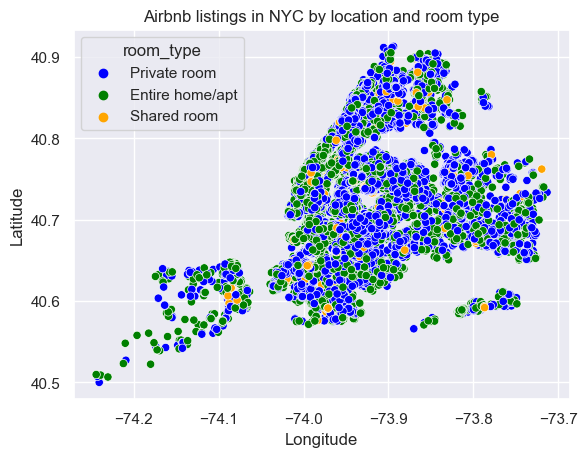

In [84]:
import seaborn as sns

# Define a custom color palette for the different room_type categories
room_type_colors = {'Private room': 'blue', 'Entire home/apt': 'green', 'Shared room': 'orange'}

# Create a scatter plot of longitude vs. latitude, with the color of the points representing the room_type category
sns.scatterplot(data=data, x='longitude', y='latitude', hue='room_type', palette=room_type_colors)

# Set the x and y axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the title of the plot
plt.title('Airbnb listings in NYC by location and room type')

# Show the plot
plt.show()


in this one we can see the locations of the listings of our different type of rooms 

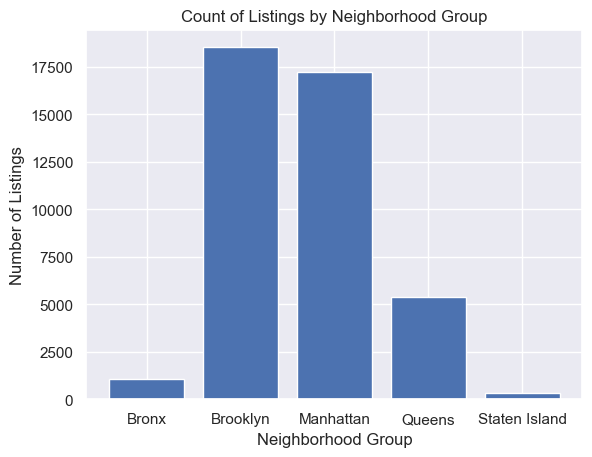

In [85]:
listings_count = data.groupby('neighbourhood_group')['id'].nunique()

# Create a bar plot
plt.bar(listings_count.index, listings_count.values)

# Add labels and title
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.title('Count of Listings by Neighborhood Group')

# Show the plot
plt.show()

we can clearly see that manhattan and brooklyn has the highest number of listings and staten island is the place where we have loweset number of listings

<AxesSubplot: xlabel='room_type', ylabel='price'>

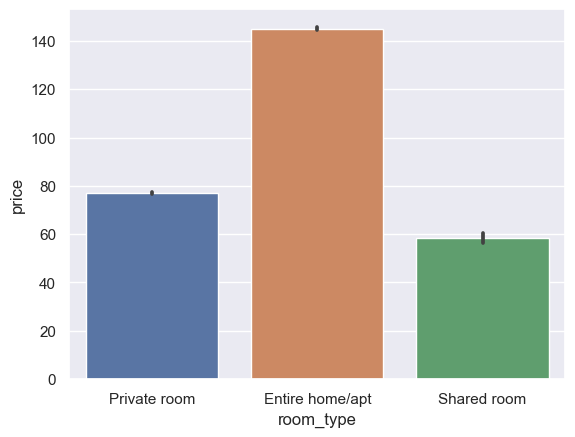

In [86]:
sns.barplot(x='room_type', y='price', data=data)

here we can see that entire home and apartment are the most priced as compare to private room and shared room

<AxesSubplot: xlabel='room_type', ylabel='minimum_nights'>

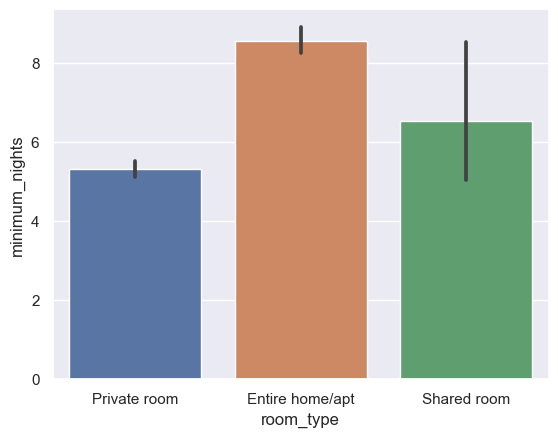

In [87]:
sns.barplot(x='room_type', y='minimum_nights', data=data)

here we can see that people mostly spend high minimum nights in entire home/apartment instead of shared room or private room

In [88]:
data.groupby('neighbourhood_group')['minimum_nights'].max()

neighbourhood_group
Bronx             365
Brooklyn          999
Manhattan        1250
Queens            500
Staten Island     365
Name: minimum_nights, dtype: int64

here we can see the maximum number of nights spend is highest in the manhattan

<AxesSubplot: xlabel='availability_365', ylabel='price'>

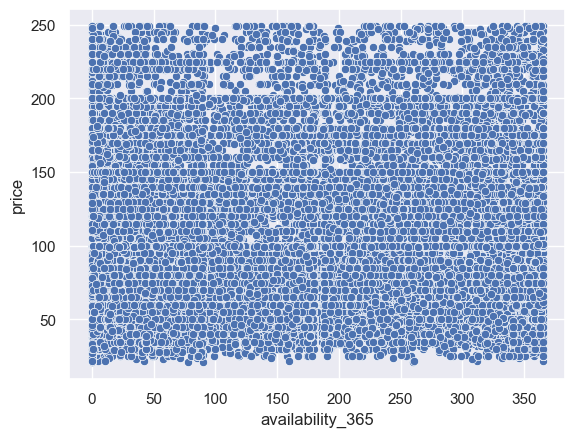

In [89]:
sns.scatterplot(x='availability_365', y='price', data=data)

there is a positive correlation between availability and price

**HYPOTHESIS TESTING**

i choosed anova test instead of t test because we can apply t test only for two sets at once but i want to do test on more than two columns and two types of columns categorical and numerical so that's why i used anova test

Null hypothesis: mean rental prices are the same across all categories of room type or neighborhood group.

Alternative hypothesis: The mean rental prices are not the same across all categories of room type or neighborhood group

there are significant differences in rental prices based on room type and neighborhood group.

In [90]:
import scipy.stats as stats

# Perform ANOVA test fot types of rooms
result = stats.f_oneway(data[data['room_type'] == 'Entire home/apt']['price'],
                        data[data['room_type'] == 'Private room']['price'],
                        data[data['room_type'] == 'Shared room']['price'])

# Print results
print('F-statistic:', result.statistic)
print('p-value:', result.pvalue)

F-statistic: 15105.277857090907
p-value: 0.0


our p value is less than 0.05 so we are going to reject the null hypothesis and accept the alternative hypothesis (The mean rental prices are not the same across all categories of room type or neighborhood group).that there are significant differences in rental prices based on room type.

In [91]:
# Perform ANOVA test for neighbourhood group 
result = stats.f_oneway(data[data['neighbourhood_group'] == 'Manhattan']['price'],
                        data[data['neighbourhood_group'] == 'Brooklyn']['price'],
                        data[data['neighbourhood_group'] == 'Queens']['price'],
                        data[data['neighbourhood_group'] == 'Bronx']['price'],
                        data[data['neighbourhood_group'] == 'Staten Island']['price'])

# Print results
print('F-statistic:', result.statistic)
print('p-value:', result.pvalue) 

F-statistic: 1346.3893077755708
p-value: 0.0


here our p value is greater than 0.5 so we are going to reject the null hypothesis and accept the alternative hypothesis(The mean rental prices are not the same across all categories of room type or neighborhood group.) that there are significant differences in rental prices based on room type.

In [92]:
import scipy.stats as stats

# Create two groups of data
group1 = data[data['neighbourhood_group'] == 'Manhattan']['price']
group2 = data[data['neighbourhood_group'] == 'Brooklyn']['price']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)


t-statistic: 55.47910570963469
p-value: 0.0


by t-test we can also see the same thing that all the p value are larger than 0.05 so we can reject the alternative hypothesis and accept the null hypothesis (mean rental prices are the same across all categories of room type or neighborhood group.)

ANALYSING RELATIONSHIP

<AxesSubplot: xlabel='number_of_reviews', ylabel='price'>

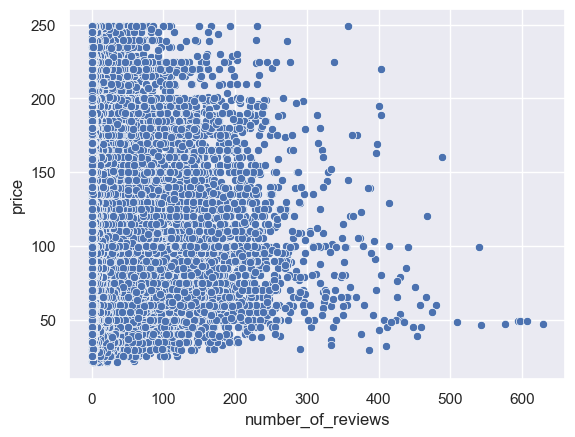

In [93]:
sns.scatterplot(x='number_of_reviews', y='price', data=data)

we can see there is negative correlation between the number of reviews and the price most of the rooms that are higher in price have less reviews. most of the number of reviews lie around 0-200 where the price are the highest


<AxesSubplot: xlabel='reviews_per_month', ylabel='price'>

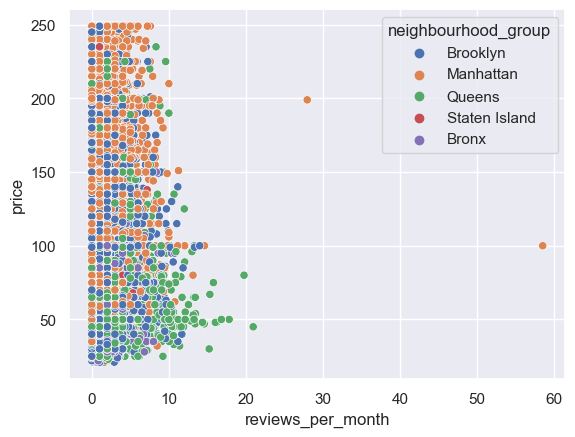

In [94]:
sns.scatterplot(x='reviews_per_month', y='price', hue='neighbourhood_group', data=data)

most of review_per_month is around 0-10 where price is also high, we can see there is no correlation here to , after 25 review per month both points are outlier

<AxesSubplot: xlabel='neighbourhood_group', ylabel='number_of_reviews'>

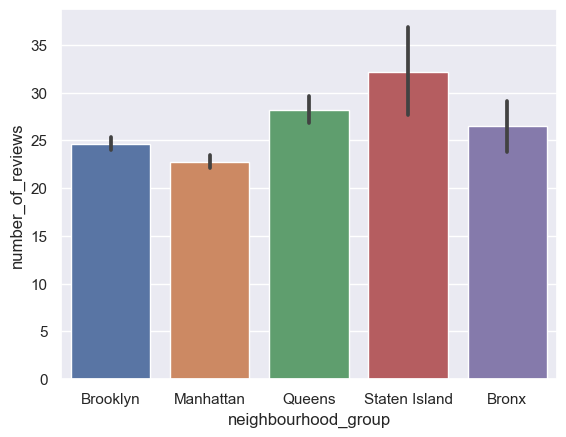

In [95]:
sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=data)


statan island has the highest number of reviews 

so we can ese that manhattan and brooklyn have the higher minimum night stay so we can say peoples prefer this place mostly or maybe there are some other reasons too

<AxesSubplot: xlabel='room_type', ylabel='number_of_reviews'>

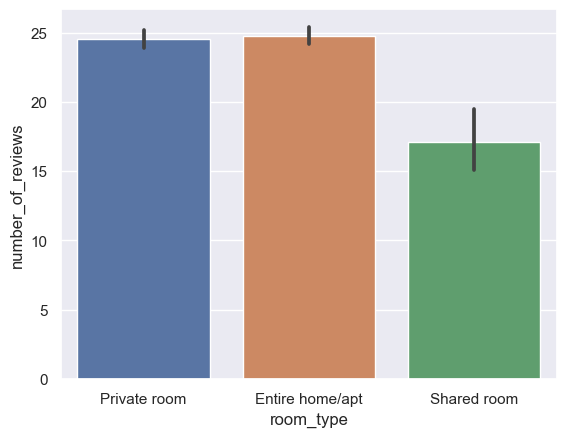

In [96]:
sns.barplot(x='room_type', y='number_of_reviews', data=data)


we can see that private room and entire home/apartment have the highest number of reviews

<AxesSubplot: xlabel='room_type', ylabel='reviews_per_month'>

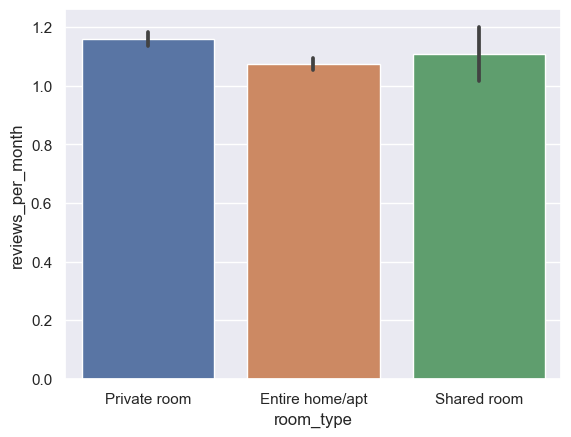

In [97]:
sns.barplot(x='room_type', y='reviews_per_month', data=data)


private rooms and shared rooms have the high reviews per month as compare to entire home/apt

reviews per month and number of review shows the costumers satisfaction

# **RECOMMENDATIONS**

**1. In the analysis we can see that private rooms and entire home/apartments have the highest customers satisfaction, so hosts could consider on offereing more private rooms and entire home/apartment to attract more satisfied customer**

**2. the analysis shows that manhattan has the highest demand and the highest rental price ,followed by brooklyn. therefore host could target these neighbourhood to increase rental price.**

**3. the analysis showed that there is positive correlation between the price and the avalability , so host could adjust price on demand and competition for example is there is high demand in a perticular neighbourhood for example manhattan , then host could increase their price to maximize their profit.**

**4. there is hgihly correlation betweeen number of reviews and the coustomers satisfaction so we have to highly focus on the customers satisfaction.**

**5. provide the detailed description of each listing so the guest are more likely to book listening because of that they can choose there desired neighbourhood and types of room ,so host should ensure that they would write information of the listing in deatil and accurate.** 

**6. In analysis we see that minimum night spend is highest in the entire home/aparment it means people are most likely to book entire home or aparment and the neighbourhood is also prefered highly so host should focus on that to increase the price and to maximize the profit.**